In [1]:
pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## API Test Code

<class 'pandas.core.frame.DataFrame'>
                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2018-01-01 00:00:00   0.6  -5.6  63.0   NaN   NaN  340.0  18.4   NaN  1024.6   
2018-01-01 01:00:00  -1.1  -6.6  66.0   0.0   NaN  320.0  16.6   NaN  1025.4   
2018-01-01 02:00:00  -1.1  -9.5  53.0   0.0   NaN  330.0  22.3   NaN  1025.8   
2018-01-01 03:00:00  -1.1 -10.0  51.0   0.0   NaN  330.0  25.9   NaN  1025.6   
2018-01-01 04:00:00  -1.7 -10.5  51.0   0.0   NaN  340.0  18.4   NaN  1026.1   
2018-01-01 05:00:00  -2.2 -10.5  53.0   0.0   NaN  330.0  25.9   NaN  1026.5   
2018-01-01 06:00:00  -3.3 -11.8  52.0   0.0   NaN  340.0  24.1   NaN  1026.9   
2018-01-01 07:00:00  -3.9 -12.8  50.0   0.0   NaN  320.0  27.7   NaN  1027.6   
2018-01-01 08:00:00  -5.0 -13.8  50.0   0.0   NaN  330.0  25.9   NaN  1028.0   
2018-01-01 09:00:00  -5.6 -14.4  50.0   0.0   NaN  330.0  22.3   NaN  1028.4   
20

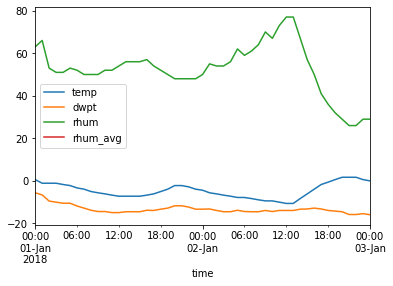

<class 'pandas.core.frame.DataFrame'>
Index(['name', 'country', 'region', 'wmo', 'icao', 'latitude', 'longitude',
       'elevation', 'timezone', 'hourly_start', 'hourly_end', 'daily_start',
       'daily_end', 'monthly_start', 'monthly_end', 'distance'],
      dtype='object')
71201
                       name country region    wmo  icao  latitude  longitude  \
id                                                                             
71201  Vancouver Harbour CS      CA     BC  71201  CWHC      49.3    -123.12   

       elevation           timezone hourly_start hourly_end daily_start  \
id                                                                        
71201        2.0  America/Vancouver   1980-03-01 2022-08-12  1925-11-01   

       daily_end monthly_start monthly_end     distance  
id                                                       
71201 2022-08-09    1925-01-01  2022-01-01  5593.335349  


In [32]:
# https://dev.meteostat.net/python/

# Import standard packages
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Import Meteostat library and dependencies
from meteostat import Stations, Daily
from meteostat import Hourly

# ## Daily Data
# # Set time period
# start = datetime(2018, 1, 1)
# end = datetime(2018, 12, 31)
# # Get daily data
# data = Daily('10637', start, end)
# data = data.fetch()
# print(data)
# # Plot line chart including average, minimum and maximum temperature
# data.plot(y=['tavg', 'tmin', 'tmax'])
# plt.show()

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 1, 3)
#end = datetime(2018, 12, 31, 23, 59)

# Get hourly data
data = Hourly('72219', start, end)
data = data.fetch()

# Print DataFrame
print(type(data))
print(data)

# Save csv to local working directory, then have to manually download the *.csv file from the left-hand pane.
data.to_csv('test_data2.csv')

# Take moving avg of humidity data
data['rhum_avg'] = data['rhum'].rolling(60*3).mean()

# Plot data
data.plot(y=['temp','dwpt', 'rhum', 'rhum_avg'])
plt.show()

# Get station number
stations = Stations()
stations = stations.nearby(49.2497, -123.1193)
station1 = stations.fetch(1)
print(type(station1))
print(station1.columns)
print(station1['wmo'].iloc[0])
print(station1)

# Simplify data
means = df.groupby(pd.Grouper(freq='1D')).mean()

In [18]:
loc1 = {'lat': 40.78, 'lon': -73.10}